Movie film script in 15-20 minutes

In [1]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
def has_nicolas_cage(cast_value):
    if isinstance(cast_value, str) and 'Nicolas Cage' in cast_value:
        return 1
    else:
        return 0




In [3]:
df=pd.read_csv('imdb-movies-dataset.csv')

In [4]:
df.drop_duplicates(inplace=True)
# df['column_name'] = df['column_name'].astype('desired_type')
# Remove leading/trailing whitespaces from string columns
# df['column_name'] = df['column_name'].str.strip()
df.drop(columns=['Poster'], inplace=True)
df['Genre'] = df['Genre'].astype(str)

In [5]:
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')
df['Review Count'] = pd.to_numeric(df['Review Count'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Year'] = df['Year'].astype(str)
# Replace NaN values with a default year (e.g., 1900)
default_year = '1900'
df['Year'] = df['Year'].replace('nan', '1900')
df['Year'].fillna(default_year, inplace=True)
# Extract year from the string and convert it to integer
df['Year'] = df['Year'].str.split('.').str[0].astype(int)
# Now convert 'Year' column to datetime with year only
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
# Print data types to confirm the change
#print(df.dtypes)

Title              object
Year                int32
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Cast               object
Votes             float64
Description        object
Review Count      float64
Review Title       object
Review             object
dtype: object


In [6]:
# Apply the custom function to create the 'Cage Movie' column
df['Cage Movie'] = df['Cast'].apply(has_nicolas_cage)

# Finding the common word in the Description of good Nicolas Cage Film to set the Plot and the best Genre

In [7]:
df['good rating'] = df['Rating'].apply(lambda x: 1 if x >= 6 else 0)

In [26]:

def remove_punctuation_and_spaces(word):
    # Create a translation table to map punctuation characters to None
    translator = str.maketrans('', '', string.punctuation + ' ')
    # Remove punctuation and spaces from the word
    cleaned_word = word.translate(translator)
    return cleaned_word

# Example DataFrame
# df = ...

# Filter the DataFrame to include only Nicolas Cage movies
nicolas_cage_movies = df[(df['Cage Movie'] == 1) & (df['good rating'] == 1)]

# Combine descriptions of Nicolas Cage movies into a single string
all_words = ' '.join(nicolas_cage_movies['Description'])

# Split the combined string into individual words
word_list = all_words.split()

# Clean the words and remove words with length less than 2
cleaned_words = [remove_punctuation_and_spaces(word) for word in word_list if len(word) > 2]

# Count the occurrences of each clean word
word_counts = {}
for word in cleaned_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sort words by their frequency (from most frequent to least frequent)
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Print the sorted words
contar=0
for word, count in sorted_words:
    print(f"{word}: {count}")
    contar+=1
    if contar>30:
        break
    


the: 42
and: 26
his: 23
who: 9
from: 9
with: 9
when: 6
are: 6
must: 6
she: 6
family: 5
finds: 5
their: 5
man: 4
lives: 4
one: 4
become: 4
has: 4
excon: 4
for: 4
find: 4
that: 4
life: 3
The: 3
into: 3
school: 3
but: 3
wakes: 3
see: 3
himself: 3
meets: 3


Notes: Familily, finds, man, she

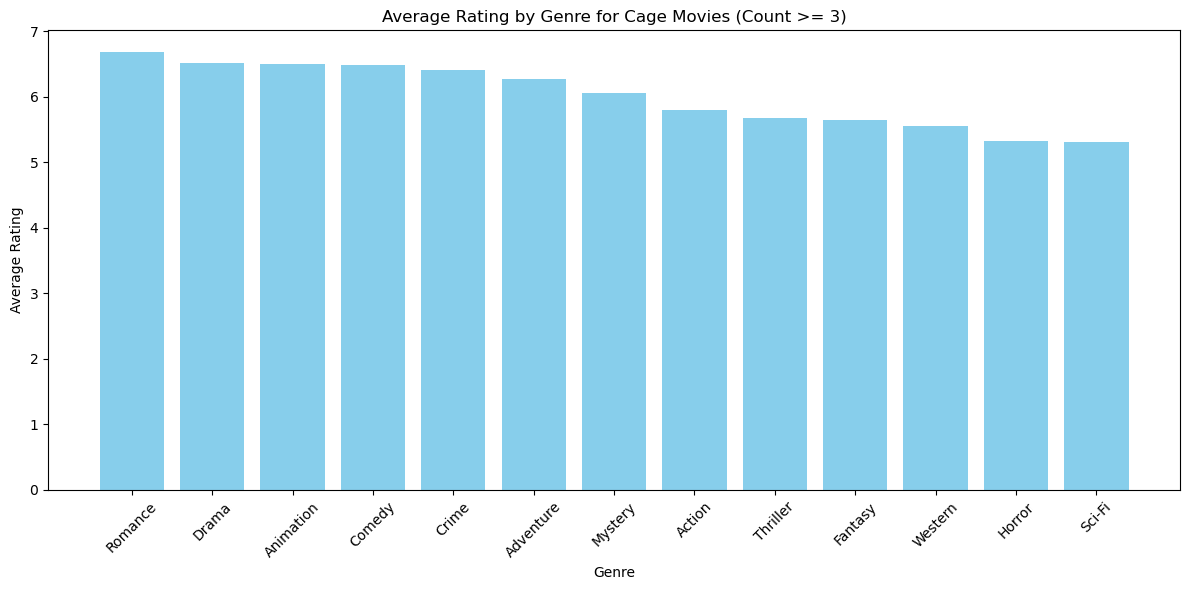

In [9]:
avg_ratings = {}
movie_counts = {}
df.dropna(subset=['Genre'], inplace=True)
# Create a list of unique categories
all_categories = ','.join(df['Genre'])
categories_list = all_categories.split(',')
unique_categories = list(set(categories_list))

for category in unique_categories:
    category_df = df[(df['Genre'].str.replace(' ', '').str.contains(category)) & (df['Cage Movie'] == 1)]
    count = len(category_df)
    if count >= 3:  # Check if count is at least 3
        avg_rating = category_df['Rating'].mean()
        avg_ratings[category] = avg_rating
        movie_counts[category] = count

# Sort categories based on average ratings in descending order
sorted_categories = sorted(avg_ratings, key=avg_ratings.get, reverse=True)

# Plot the average rating for each category where 'Cage Movie' is equal to 1 and count >= 3
plt.figure(figsize=(12, 6))
plt.bar(sorted_categories, [avg_ratings[category] for category in sorted_categories], color='skyblue')

plt.title('Average Rating by Genre for Cage Movies (Count >= 3)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
! pip install replicate

   ---------------------------------------- 0.0/40.0 kB ? eta -:--:--
   ------------------------------ --------- 30.7/40.0 kB 1.3 MB/s eta 0:00:01
   ------------------------------ --------- 30.7/40.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 40.0/40.0 kB 238.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/75.6 kB ? eta -:--:--
   ------------------------------------- -- 71.7/75.6 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 75.6/75.6 kB 837.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/77.9 kB ? eta -:--:--
   ------------------------------------ --- 71.7/77.9 kB ? eta -:--:--
   ---------------------------------------- 77.9/77.9 kB 867.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
   ----------------------------------- ---- 51.2/58.3 kB ? eta -:--:--
   ---------------------------------------- 58.3/58.3 kB 615.6 kB/s eta 0:00:00


In [15]:

import os

os.environ["REPLICATE_API_TOKEN"] = "r8_e9Eu2lEDb9vN1Y9lb0VD3i7su3zTPuU3hkwcb"

In [22]:

import replicate

# Prompts
pre_prompt = "You are a talented tv script writer. You will only generate TV script with dialog and description. No more than 500 words per response'."
prompt_input = "Can you make a a TV script for Nicolas Cage, Genre Drama, caracters man call John Doe and woman call Jane and they are learning some new about their families "

# Generate LLM response
output = replicate.run('a16z-infra/llama13b-v2-chat:df7690f1994d94e96ad9d568eac121aecf50684a0b0963b25a41cc40061269e5', # LLM model
                        input={"prompt": f"{pre_prompt} {prompt_input} Assistant: ", # Prompts
                        "temperature":0.1, "top_p":0.9, "max_length":128, "repetition_penalty":1})  # Model parameters
   

In [23]:
output

<generator object Prediction.output_iterator at 0x0000027F45272E30>

In [24]:

full_response = ""

for item in output:
  full_response += item

print(full_response)

 Sure, I'd be happy to help! Here is a TV script for a drama featuring Nicolas Cage, with a focus on characters learning new things about their families:

Title: "The Family Secret"

FADE IN:

INT. JOHN'S APARTMENT - DAY

We see JOHN DOE (played by Nicolas Cage), a middle-aged man sitting on his couch, staring at a photo album. He looks lost in thought.

JOHN: (to himself) I never knew my family had so many secrets.

Suddenly, there is a knock at the door. It's JANE (played by a talented actress), a woman in her 30s, with long blonde hair and piercing green eyes. She is John's girlfriend.

JANE: Hey, I'm home!

JOHN: (excitedly) Hey, I was just looking at this old photo album. I found it in the attic of my parents' house.

JANE: (curious) Oh, really? What's in it?

JOHN: (hesitantly) Well, it's stuff from my family's past. Stuff I never knew about.

JANE: (encouragingly) Tell me more.

John hesitates, then begins to show Jane the photos and tell her the stories behind them. As he does,